Step 1: Load and Inspect the Data


In [5]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('/content/passes.csv')

# Display the column names
print(data.columns)

# Display the first few rows of the dataframe
print(data.head())

# Get a concise summary of the dataframe
print(data.info())

# Descriptive statistics
print(data.describe())


Index(['game_id;passing_quote;winner'], dtype='object')
  game_id;passing_quote;winner
0                     11;72;No
1                    11;91;Yes
2                    12;82;Yes
3                     12;86;No
4                    13;82;Yes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 1 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   game_id;passing_quote;winner  306 non-null    object
dtypes: object(1)
memory usage: 2.5+ KB
None
       game_id;passing_quote;winner
count                           306
unique                          304
top                        47;69;No
freq                              2


In [7]:
# Adjust delimiter as needed

data = pd.read_csv('/content/passes.csv', delimiter=';')


In [8]:
# Example: Stripping whitespace from column names
data.columns = data.columns.str.strip()


Step 2: Descriptive Analysis


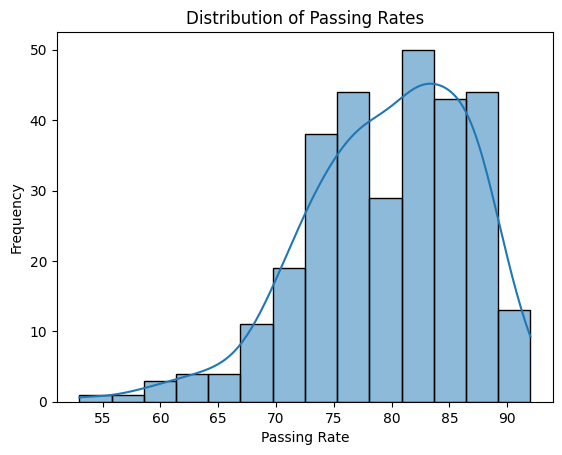

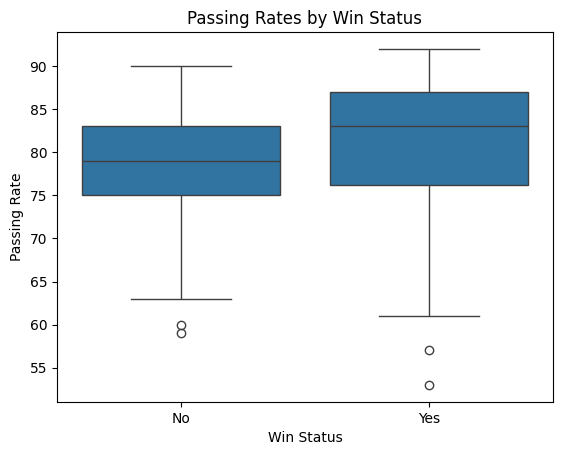

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file with the correct delimiter
data = pd.read_csv('/content/passes.csv', delimiter=';')

# Rename columns appropriately
data.columns = ['game_id', 'passing_rate', 'win']

# Convert passing_rate to numeric if it's read as a string
data['passing_rate'] = pd.to_numeric(data['passing_rate'], errors='coerce')

# Drop any rows with NaN values that might have been introduced by conversion errors
data.dropna(inplace=True)

# Histogram of passing rates
sns.histplot(data['passing_rate'], kde=True)
plt.title('Distribution of Passing Rates')
plt.xlabel('Passing Rate')
plt.ylabel('Frequency')
plt.show()

# Box plot for passing rates by win status
sns.boxplot(x='win', y='passing_rate', data=data)
plt.title('Passing Rates by Win Status')
plt.xlabel('Win Status')
plt.ylabel('Passing Rate')
plt.show()


Step 3: Hypothesis Testing


In [12]:
#Step 1: Verify the 'win' Column Values

# Check unique values in the 'win' column
print(data['win'].unique())


['No' 'Yes']


In [21]:
#Step 2: Correct Filtering If Necessary
winners = data[data['win'] == 'Yes']['passing_rate']
losers = data[data['win'] == 'No']['passing_rate']


In [22]:
#Step 3: Check for NaN Values in 'passing_rate'

# Print the number of NaN values in each subset
print("NaNs in winners' passing rates:", winners.isna().sum())
print("NaNs in losers' passing rates:", losers.isna().sum())


NaNs in winners' passing rates: 0
NaNs in losers' passing rates: 0


In [23]:
#Step 4: Ensure Sufficient Data

# Print the number of entries in each subset
print("Number of entries in winners:", winners.size)
print("Number of entries in losers:", losers.size)


Number of entries in winners: 114
Number of entries in losers: 190


In [20]:
#Step 5: Drop NaN Values If Necessary

# Drop NaN values from the subsets
winners = winners.dropna()
losers = losers.dropna()


In [19]:
# Perform t-test
t_stat, p_val = ttest_ind(winners, losers, equal_var=False)  # equal_var=False for Welch's t-test, if variances are not assumed to be equal

print(f'T-statistic: {t_stat}, P-value: {p_val}')


T-statistic: 2.558073778223821, P-value: 0.011305613612228455
